In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print(sys.path)
sys.path.append("/home/momentino/GarbageDetectionAndSegmentation")

['/home/momentino/GarbageDetectionAndSegmentation/notebooks', '/usr/lib64/python310.zip', '/usr/lib64/python3.10', '/usr/lib64/python3.10/lib-dynload', '', '/home/momentino/.local/lib/python3.10/site-packages', '/usr/lib64/python3.10/site-packages', '/usr/lib/python3.10/site-packages']


# Load Dataset

2022-12-31 11:21:42.086301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-31 11:21:42.243949: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-31 11:21:42.243971: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-31 11:21:42.984763: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

creating index...
index created!
Number of images used: 1500
Class Count: 2
  0. BG                                                
  1. Litter                                            
  Categories  Number of annotations
1     Litter                   4784
0         BG                      0


/tmp/ipykernel_6405/1330171017.py:42: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only.
  df = df.sort_values('Number of annotations', 0, False)


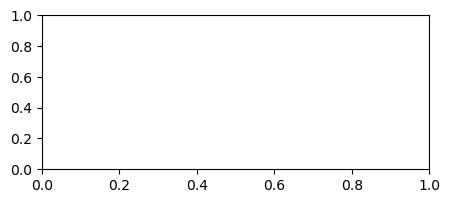

In [2]:
import csv
import dataset

# Load class map - these tables map the original TACO classes to your desired class system
# and allow you to discard classes that you don't want to include.
class_map = {}
with open("/home/momentino/TACO/detector/taco_config/map_1.csv") as csvfile:
    reader = csv.reader(csvfile)
    class_map = {row[0]:row[1] for row in reader}

# Load full dataset or a subset
TACO_DIR = "/home/momentino/TACO/data"
round = None # Split number: If None, loads full dataset else if int > 0 selects split no 
subset = "train" # Used only when round !=None, Options: ('train','val','test') to select respective subset
dataset = dataset.Taco()
taco = dataset.load_taco(TACO_DIR, round, subset, class_map=class_map, return_taco=True)

# Must call before using the dataset
dataset.prepare()

print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))
    
import seaborn as sns
import pandas as pd

# Count annotations
cat_histogram = np.zeros(dataset.num_classes,dtype=int)
class_names = []
for i, info in enumerate(dataset.class_info):
    ann_per_cat = taco.getAnnIds(catIds=i, iscrowd=None)
    cat_histogram[i] = len(ann_per_cat)
    class_names.append(info['name'])
    
# Initialize the matplotlib figure
_, ax = plt.subplots(figsize=(5,1*dataset.num_classes))

# Convert to DataFrame
d ={'Categories': class_names, 'Number of annotations': cat_histogram}
df = pd.DataFrame(d)
df = df.sort_values('Number of annotations', 0, False)
print(df)